In [1]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras import optimizers, metrics, models
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout
from keras.utils.np_utils import to_categorical

In [2]:
# Declaring the main directory
dir = '../input/natural-images/natural_images/'

# Features and Labels
ft = []
lb = []
labels = {}

# Extracting label string and index
for i, k in enumerate(os.listdir(dir)):
    labels[k] = i
    
# Appending features and labels
for i in os.listdir(dir):
    subdir = os.path.join(dir, i)
    for j in tqdm(os.listdir(subdir)):
        im = cv2.imread(os.path.join(subdir, j), 0)
        im = cv2.resize(im, (70, 70))
        ft.append(im)
        
        lb.append(labels[i])
        

100%|██████████| 986/986 [00:08<00:00, 121.50it/s]


In [3]:
# Converting to numpy arrays
ft = np.array(ft)
lb = np.array(lb).reshape(6899, 1)

ft.shape, lb.shape

((6899, 70, 70), (6899, 1))

In [4]:
# Reshaping features to add dimension for graychannel
X = ft.reshape(-1, 70, 70, 1)
X.shape

(6899, 70, 70, 1)

In [5]:
# One Hot Encoding label values
Y = to_categorical(lb)
Y.shape

(6899, 8)

In [6]:
# Normalizing feautures values
X = X/255.0

In [25]:
# Spliting into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5174, 70, 70, 1), (1725, 70, 70, 1), (5174, 8), (1725, 8))

In [26]:
# Shape of one element of x_train
x_train.shape[1:]

(70, 70, 1)

In [27]:
# Initializing the model instance
model = models.Sequential()

# Adding layers to model instance
model.add(Conv2D(32,(3,3) , padding='same' , input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(1024,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(8,activation='softmax')) # 8 neurons for 8 classes

In [28]:
# Checking model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 70, 70, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 70, 70, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 35, 35, 64)        18496     
_________________________________________________________________
activation_13 (Activation)   (None, 35, 35, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 64)       

In [29]:
# Compiling the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [30]:
# Importing a callback
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=5)

hist = model.fit(x_train, y_train, 
          epochs=180,
          callbacks=[early_stopping_monitor],
          validation_data=(x_test, y_test))

Epoch 1/180
162/162 [==============================] - 3s 14ms/step - loss: 2.0752 - accuracy: 0.1488 - val_loss: 2.0709 - val_accuracy: 0.1374
Epoch 2/180
162/162 [==============================] - 2s 13ms/step - loss: 2.0607 - accuracy: 0.1553 - val_loss: 2.0659 - val_accuracy: 0.1809
Epoch 3/180
162/162 [==============================] - 2s 12ms/step - loss: 2.0520 - accuracy: 0.1736 - val_loss: 2.0532 - val_accuracy: 0.2313
Epoch 4/180
162/162 [==============================] - 2s 12ms/step - loss: 2.0250 - accuracy: 0.1930 - val_loss: 2.0280 - val_accuracy: 0.2568
Epoch 5/180
162/162 [==============================] - 2s 13ms/step - loss: 1.9655 - accuracy: 0.2453 - val_loss: 1.9224 - val_accuracy: 0.2812
Epoch 6/180
162/162 [==============================] - 2s 12ms/step - loss: 1.8399 - accuracy: 0.2938 - val_loss: 1.7733 - val_accuracy: 0.4000
Epoch 7/180
162/162 [==============================] - 2s 13ms/step - loss: 1.7320 - accuracy: 0.3429 - val_loss: 1.7327 - val_accuracy:

In [31]:
print('Training Accuracy: {0:.2%}'.format(float(model.evaluate(x_train,y_train)[1])))
print('Testing Accuracy: {0:.2%}'.format(float(model.evaluate(x_test,y_test)[1])))

162/162 [==============================] - 1s 4ms/step - loss: 0.2720 - accuracy: 0.9020
Training Accuracy: 90.20%
54/54 [==============================] - 0s 4ms/step - loss: 0.3965 - accuracy: 0.8464
Testing Accuracy: 84.64%


In [32]:
# Training History
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

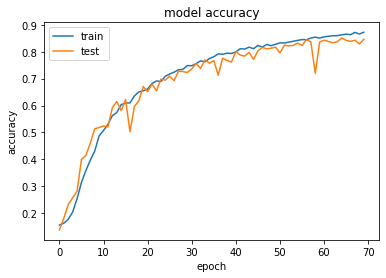

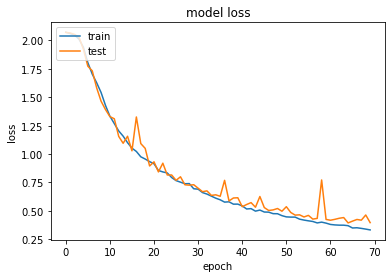

In [33]:
# Summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model accuracy.png')
plt.show()
# Summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model loss.png')
plt.show()

In [34]:
# List with label names
rev_labels = []

for i, k in enumerate(labels.keys()):
    rev_labels.append(k)

rev_labels

['motorbike', 'airplane', 'flower', 'dog', 'fruit', 'car', 'cat', 'person']

546
cat


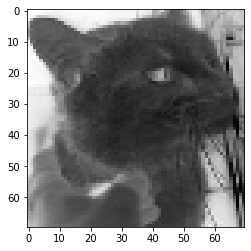

In [55]:
# Prediction
i = int(input())

print(rev_labels[np.argmax(model.predict([x_test[i:i+1]]))])
plt.imshow(x_test[i], cmap='binary')
plt.show()

In [53]:
# Exporting the model
model.save('natural_images_v5.h5')

In [54]:
# Exporting training history
import pickle

with open('history.pkcl', 'wb') as f:
    pickle.dump(hist.history, f)